In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"punitpawar","key":"59e824c52c9ebf9460dad1b2b64c0f2e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle
!kaggle datasets download -d msambare/fer2013
!unzip -q fer2013.zip -d fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.37GB/s]


In [ ]:
# Check the contents of the unzipped directory
!ls -l fer2013/train/
!ls -l fer2013/test/

total 1268
drwxr-xr-x 2 root root 192512 Jun 23 04:27 angry
drwxr-xr-x 2 root root  20480 Jun 23 04:27 disgust
drwxr-xr-x 2 root root 192512 Jun 23 04:27 fear
drwxr-xr-x 2 root root 294912 Jun 23 04:27 happy
drwxr-xr-x 2 root root 233472 Jun 23 04:27 neutral
drwxr-xr-x 2 root root 229376 Jun 23 04:27 sad
drwxr-xr-x 2 root root 135168 Jun 23 04:27 surprise
total 348
drwxr-xr-x 2 root root 45056 Jun 23 04:27 angry
drwxr-xr-x 2 root root  4096 Jun 23 04:27 disgust
drwxr-xr-x 2 root root 53248 Jun 23 04:27 fear
drwxr-xr-x 2 root root 77824 Jun 23 04:27 happy
drwxr-xr-x 2 root root 65536 Jun 23 04:27 neutral
drwxr-xr-x 2 root root 69632 Jun 23 04:27 sad
drwxr-xr-x 2 root root 40960 Jun 23 04:27 surprise


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'fer2013/train',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'fer2013/test',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 emotion classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=30, callbacks=[early_stop])

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.2390 - loss: 1.8302 - val_accuracy: 0.2696 - val_loss: 1.7551
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2599 - loss: 1.7820 - val_accuracy: 0.2901 - val_loss: 1.7197
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2692 - loss: 1.7698 - val_accuracy: 0.3073 - val_loss: 1.6995
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2788 - loss: 1.7539 - val_accuracy: 0.3144 - val_loss: 1.6764
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2936 - loss: 1.7324 - val_accuracy: 0.3286 - val_loss: 1.6746
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2962 - loss: 1.7235 - val_accuracy: 0.3410 - val_loss: 1.6306
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.3062 - loss: 1.7103 - val_accuracy: 0.3780 - val_loss: 1.5797
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.3176 - loss: 1.6973 - val_accurac

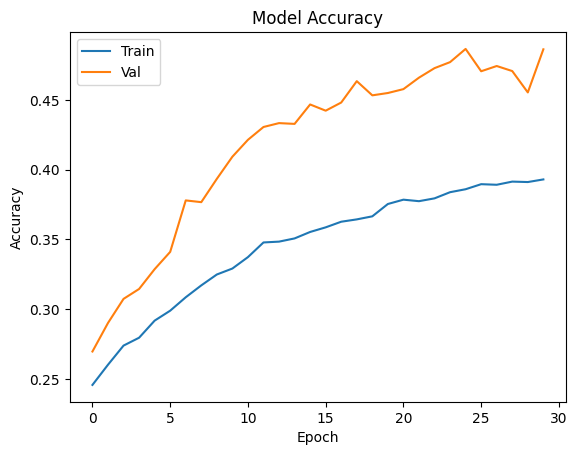

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

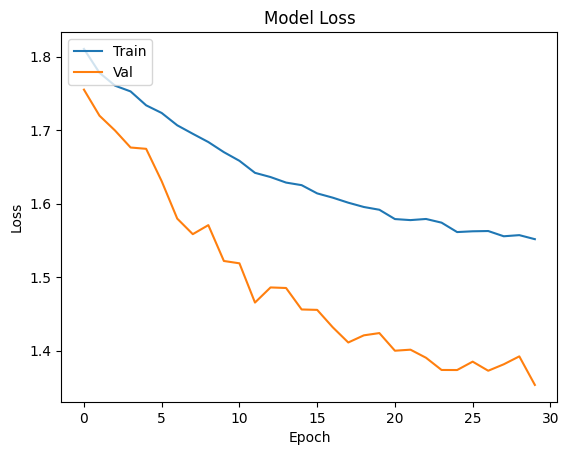

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving download.jpg to download (1).jpg


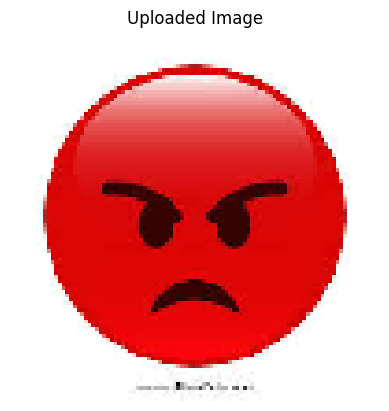

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

image_path = list(uploaded.keys())[0]
img = load_img(image_path, target_size=IMG_SIZE)
plt.imshow(img)
plt.axis('off')
plt.title('Uploaded Image')
plt.show()

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Correctly define the target size used during training
TARGET_SIZE = (48, 48)

image_path = list(uploaded.keys())[0]

# Load the image in grayscale and with the correct target size
img = load_img(image_path, target_size=TARGET_SIZE, color_mode='grayscale')


img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

pred = model.predict(img_array)
pred_class_index = np.argmax(pred)

# Access the correct attribute from the correct variable name
pred_class_label = list(train_generator.class_indices.keys())[pred_class_index]

print("Predicted class = ", pred_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class =  angry
